# Importing Dependencies

In [239]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

# Data Collection and Preprocessing

In [240]:
students_dataset = pd.read_csv("C:/Users/pc/Machine Learning Workspace/Datasets/student-scores.csv")

In [241]:
students_dataset.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


In [242]:
# Checking for missing values
students_dataset.isnull().sum()

id                            0
first_name                    0
last_name                     0
email                         0
gender                        0
part_time_job                 0
absence_days                  0
extracurricular_activities    0
weekly_self_study_hours       0
career_aspiration             0
math_score                    0
history_score                 0
physics_score                 0
chemistry_score               0
biology_score                 0
english_score                 0
geography_score               0
dtype: int64

In [243]:
# Statistical measures
students_dataset.describe()

,id,absence_days,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,1000.500000,3.665500,17.755500,83.452000,80.332000,81.336500,79.995000,79.58150,81.277500,80.888000
std,577.494589,2.629271,12.129604,13.224906,12.736046,12.539453,12.777895,13.72219,12.027087,11.637705
min,1.000000,0.000000,0.000000,40.000000,50.000000,50.000000,50.000000,30.00000,50.000000,60.000000
25%,500.750000,2.000000,5.000000,77.000000,69.750000,71.000000,69.000000,69.00000,72.000000,71.000000
50%,1000.500000,3.000000,18.000000,87.000000,82.000000,83.000000,81.000000,81.00000,83.000000,81.000000
75%,1500.250000,5.000000,28.000000,93.000000,91.000000,92.000000,91.000000,91.00000,91.000000,91.000000
max,2000.000000,10.000000,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,99.000000,100.000000


**Data Visualization**

In [244]:
# Checking Correlation
corr = students_dataset[['math_score', 'history_score', 'physics_score', 'chemistry_score', 'biology_score', 'english_score', 'geography_score']].corr()

<Axes: >

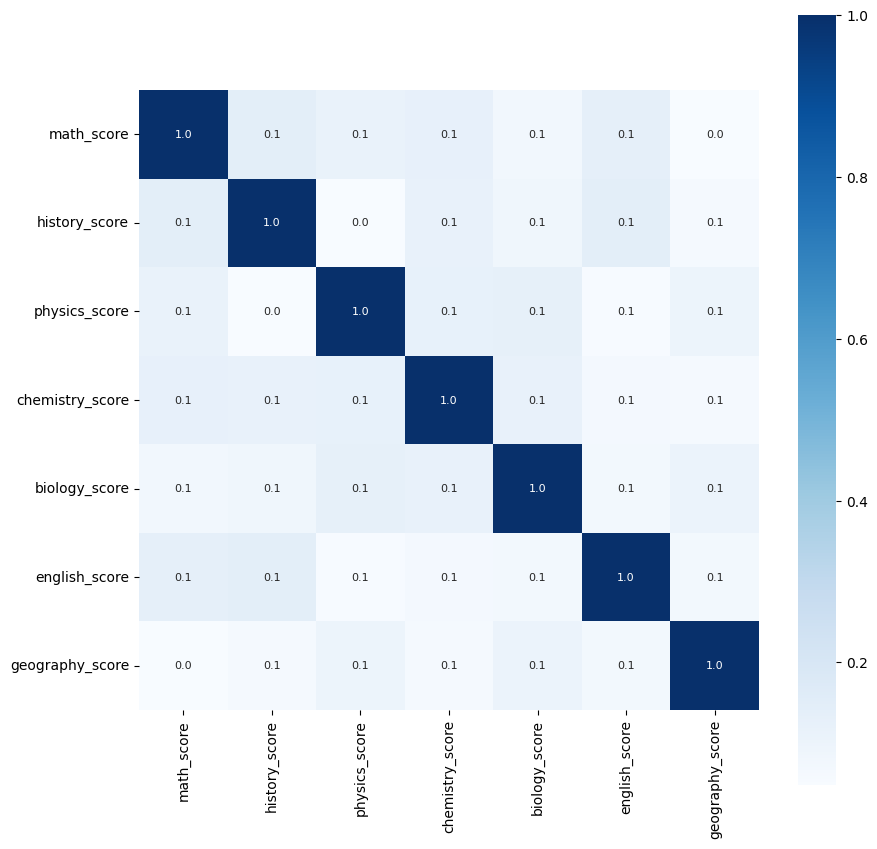

In [245]:
# Data visualisation: constructing heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

**Dropping Irrelevant columns**

In [246]:
students_dataset = students_dataset.drop(columns=['id', 'first_name', 'last_name', 'email'], axis=1)

In [247]:
students_dataset.head()

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


**Label Encoding**

In [248]:
label_encoder = LabelEncoder()

In [249]:
gender_labels = label_encoder.fit_transform(students_dataset['gender'])
job_labels = label_encoder.fit_transform(students_dataset['part_time_job'])
activities_labels = label_encoder.fit_transform(students_dataset['extracurricular_activities'])
career_labels = label_encoder.fit_transform(students_dataset['career_aspiration'])

In [250]:
students_dataset['gender'] = gender_labels
students_dataset['part_time_job'] = job_labels
students_dataset['extracurricular_activities'] = activities_labels
students_dataset['career_aspiration'] = career_labels

In [251]:
students_dataset.head()

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,0,3,0,27,9,73,81,93,97,63,80,87
1,0,0,2,0,47,6,90,86,96,100,90,88,90
2,0,0,9,1,13,8,81,97,95,96,65,77,94
3,0,0,5,0,3,1,71,74,88,80,89,63,86
4,1,0,5,0,10,15,84,77,65,65,80,74,76


# Splitting the data into training & testing data

In [252]:
X = students_dataset.drop(columns='math_score', axis=1)
Y = students_dataset['math_score'] #PREDICTING FOR MATH SCORE

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=7)

# Training the model

In [253]:
regressor = XGBRegressor()

In [254]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

**Prediction on training data**

In [255]:
training_prediction = regressor.predict(X_train)

In [256]:
r_squared = metrics.r2_score(Y_train, training_prediction)
mae = metrics.mean_absolute_error(Y_train, training_prediction)

In [257]:
print(f"R Squared Error: {r_squared}")
print(f"Mean Absolute Error: {mae}")

R Squared Error: 0.9920954704284668
Mean Absolute Error: 0.8152310848236084


**Prediction on testing data**

In [258]:
testing_prediction = regressor.predict(X_test)

In [259]:
score_1 = metrics.r2_score(Y_test, testing_prediction)
score_2 = metrics.mean_absolute_error(Y_test, testing_prediction)

In [260]:
print(f"R Squared Error: {score_1}")
print(f"Mean Absolute Error: {score_2}")

R Squared Error: 0.21416717767715454
Mean Absolute Error: 9.204662322998047


# Visualising the actual scores against predicted scores

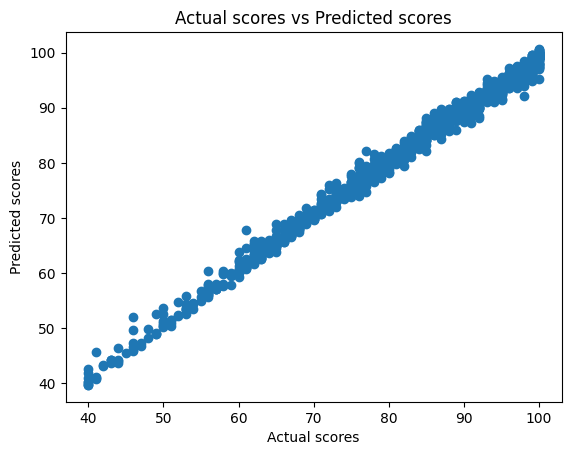

In [261]:
plt.scatter(Y_train, training_prediction)
plt.xlabel('Actual scores')
plt.ylabel('Predicted scores')
plt.title('Actual scores vs Predicted scores')
plt.show()

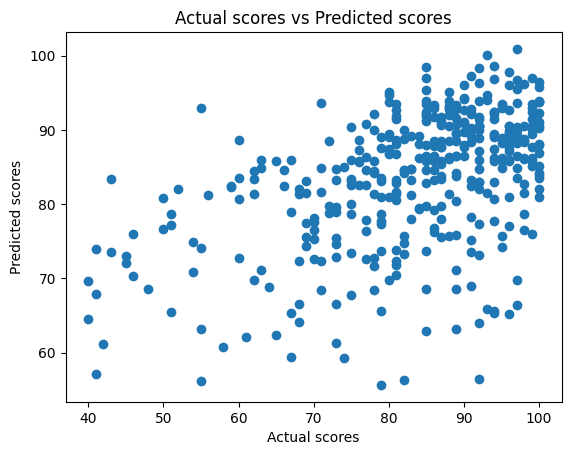

In [262]:
plt.scatter(Y_test, testing_prediction)
plt.xlabel('Actual scores')
plt.ylabel('Predicted scores')
plt.title('Actual scores vs Predicted scores')
plt.show()